Regression Neural Network

Импортируем подготовленные данные из сохраненого файла и помещяем в переменные соответствующие записи.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing prepared dataset
import pickle
input = open('vehicleprice_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

Произведем шкалирование данных, использя выборку train оценим параметры, затем преобразуем обучающую и тестовую выборки.

In [3]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(np.array([[i] for i in y_train]))
y_train = sc_y.transform(np.array([[i] for i in y_train]))
y_test = sc_y.transform(np.array([[i] for i in y_test]))

Подключим библиотеки, необходимые для работы с нейронными сетями.

In [4]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Создаем последовательную нейронную сеть: 
Добавляем к ней слои, размерность входного слоя равна 8 (в соответствии с переменными предыдущей модели), число нейронов на выходном слое задаем равным 16, так как модель расширяющаяся, функция активации на первом слое-гиперболический тангенс.
На втором слое количество нейронов оставляем равным 16, та же функция активации.
На последнем слое используем линейную функцию активации.

In [5]:
# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(units = 16, activation = 'tanh', input_dim = 8))

# Adding the second hidden layer
rnn.add(Dense(units = 16, activation = 'tanh'))

# Adding the output layer
rnn.add(Dense(units = 1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

Обучаем модель партиями по 10 объектов в течении 100 эпох.

In [6]:
# Fitting the ANN to the Training set
rnn.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
156/156 [==============================] - 0s 1ms/step - loss: 0.7204 - accuracy: 0.0000e+00
Epoch 2/100
156/156 [==============================] - 0s 1ms/step - loss: 0.4147 - accuracy: 0.0000e+00
Epoch 3/100
156/156 [==============================] - 0s 921us/step - loss: 0.3821 - accuracy: 0.0000e+00
Epoch 4/100
156/156 [==============================] - 0s 885us/step - loss: 0.3661 - accuracy: 0.0000e+00
Epoch 5/100
156/156 [==============================] - 0s 939us/step - loss: 0.3464 - accuracy: 0.0000e+00
Epoch 6/100
156/156 [==============================] - 0s 904us/step - loss: 0.3303 - accuracy: 0.0000e+00
Epoch 7/100
156/156 [==============================] - 0s 872us/step - loss: 0.3133 - accuracy: 0.0000e+00
Epoch 8/100
156/156 [==============================] - 0s 807us/step - loss: 0.2993 - accuracy: 0.0000e+00
Epoch 9/100
156/156 [==============================] - 0s 788us/step - loss: 0.2833 - accuracy: 0.0000e+00
Epoch 10/100
156/156 [===================

Epoch 77/100
156/156 [==============================] - 0s 806us/step - loss: 0.1624 - accuracy: 0.0000e+00
Epoch 78/100
156/156 [==============================] - 0s 789us/step - loss: 0.1610 - accuracy: 0.0000e+00
Epoch 79/100
156/156 [==============================] - 0s 814us/step - loss: 0.1595 - accuracy: 0.0000e+00
Epoch 80/100
156/156 [==============================] - 0s 801us/step - loss: 0.1648 - accuracy: 0.0000e+00
Epoch 81/100
156/156 [==============================] - 0s 795us/step - loss: 0.1608 - accuracy: 0.0000e+00
Epoch 82/100
156/156 [==============================] - 0s 795us/step - loss: 0.1583 - accuracy: 0.0000e+00
Epoch 83/100
156/156 [==============================] - 0s 795us/step - loss: 0.1590 - accuracy: 0.0000e+00
Epoch 84/100
156/156 [==============================] - 0s 794us/step - loss: 0.1602 - accuracy: 0.0000e+00
Epoch 85/100
156/156 [==============================] - 0s 795us/step - loss: 0.1598 - accuracy: 0.0000e+00
Epoch 86/100
156/156 [======

Строим прогноз на тестовом множестве.

In [7]:
# Predicting the Test set results
y_pred = rnn.predict(X_test)

Осуществляем обратное шкалирование

In [8]:
# Inversing scaling
#yhat = pd.DataFrame(yhat, columns=['yhat']) 
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

Вычмслим сумму квадратов ошибок на тестовом множестве.

In [9]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat)

20180858.643086202

Видим, что MSE в модели нейронной сети (20180858) значительно сократилась по сравнения с моделью регрессии (35570626).

Построим график, на котором видно, что построенная модель нейронной сети сработала довольно четко по сравнению с многофакторной регрессией.

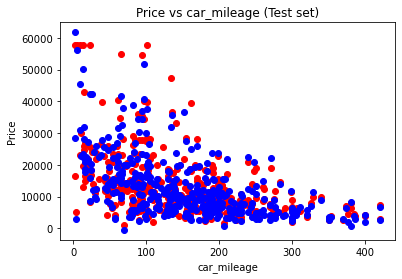

In [10]:
# Visualising the Test set results
plt.scatter(X_test[:,4], y_test, color = 'red')
plt.plot(X_test[:,4], y_hat, 'bo')
plt.title('Price vs car_mileage (Test set)')
plt.xlabel('car_mileage')
plt.ylabel('Price')
plt.show()